# 2. Model Building and Evaluation

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd '/content/drive/MyDrive/MIDS/DATASCI 281 Summer 2025/datasci281_final_project (github)'

/content/drive/MyDrive/MIDS/DATASCI 281 Summer 2025/datasci281_final_project (github)


### 0. Imports

In [13]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import cv2 as cv
from utils import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost
import joblib

### 1. Load in Processed Images

In [14]:
cwd = os.getcwd()
os.listdir(cwd)

['README.md',
 '.git',
 'data',
 '__pycache__',
 'standardized_data',
 'data_processed',
 '0. preprocessing_and_eda.ipynb',
 '1. feature_exploration.ipynb',
 'X_train_doh_features.npy',
 'X_train_dog_features.npy',
 'Y_raw_train.npy',
 'complex_feat_testing.joblib',
 'Y_train.npy',
 'X_test_dog.npy',
 'X_train_pca_canny_features.npy',
 'X_test_doh.npy',
 'complex_feat_training.joblib',
 'y_test.npy',
 'y_raw_test.npy',
 'utils_1.py',
 'logistic_model_dog.joblib',
 'logistic_model_doh.joblib',
 'logistic_model_canny.joblib',
 'logistic_model_complex.joblib',
 'rf_model_dog.joblib',
 'rf_model_doh.joblib',
 'rf_model_canny.joblib',
 'rf_model_complex.joblib',
 'utils.py',
 'X_test_canny.npy',
 '2. model_building.ipynb']

In [15]:
data_path = os.path.join(cwd,'standardized_data/Training')

X = []
y = []

for label in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path,label)):
        image_path = os.path.join(data_path,label,image)
        load_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        # flatten_image = load_image.flatten()
        X.append(load_image)
        y.append(label)


# Convert to Numpy Array
X = np.array(X)
y = np.array(y)
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

print(X.shape)
print(y.shape)

print(X[0])
print(y[0])

(5712, 512, 512)
(5712,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


### 2. Base Model (most common class classifier)

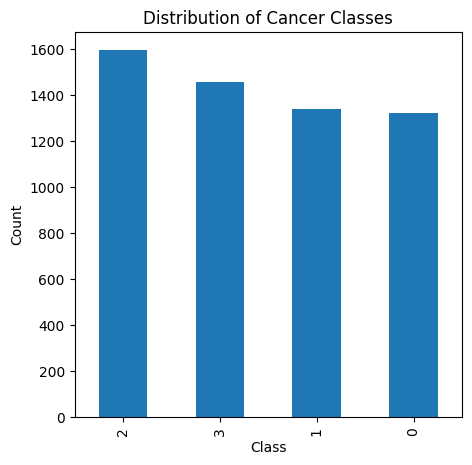

['glioma' 'meningioma' 'notumor' 'pituitary']


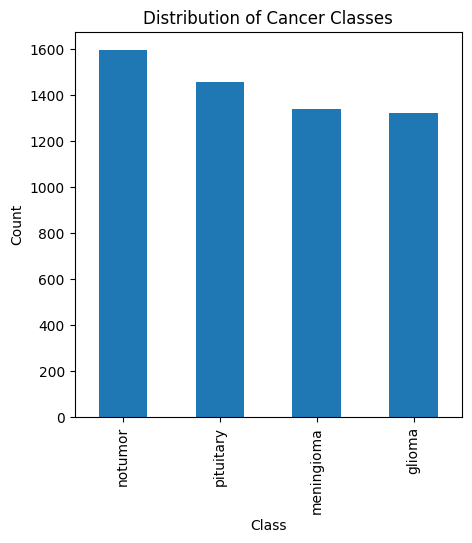

Most Common Label: 2
(5712,)
(5712,)


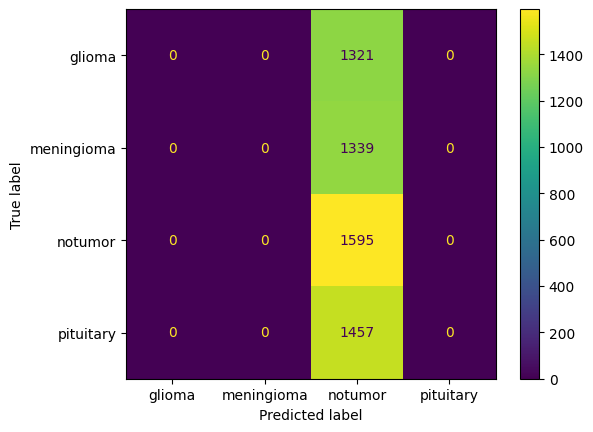

================== TRAINING METRICS ===================
Accuracy Score: 0.27923669467787116
Macro Precision: 0.06980917366946779
Macro Recall: 0.25
Macro F1: 0.10914191870808813
Micro Precision: 0.27923669467787116
Micro Recall: 0.27923669467787116
Micro F1: 0.27923669467787116


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
plt.figure(figsize=(5,5))
y_train_series = pd.Series(y)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(le.classes_)
y_transformed = le.inverse_transform(y)

plt.figure(figsize=(5,5))
y_train_series = pd.Series(y_transformed)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Generate Model Statistics
most_common_label = stats.mode(y)[0]
print("Most Common Label: " + str(most_common_label))
y_predict = np.ones((y.shape)) * most_common_label
print(y_predict.shape)
print(y.shape)

# Generate Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y, y_predict)
macro_precision = metrics.precision_score(y,y_predict,average ='macro')
macro_recall = metrics.recall_score(y,y_predict,average='macro')
macro_f1 = metrics.f1_score(y,y_predict,average='macro')
micro_precision = metrics.precision_score(y,y_predict,average='micro')
micro_recall = metrics.recall_score(y,y_predict,average='micro')
micro_f1 = metrics.f1_score(y,y_predict,average='micro')

print("================== TRAINING METRICS ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

### 3. Extract Features (Canny Edges, Difference of Gaussians, Complex Feature)

In [7]:
# ### TBD
# X_dog_features = get_features(X, feat_name='blob_dog')
# X_doh_features = get_features(X, feat_name='blob_doh')
# X_canny_features = get_features(X, feat_name='canny')
# pca = PCA(n_components=1000, svd_solver="randomized", whiten=True).fit(X_canny_features)
# X_pca_canny_features = pca.transform(X_canny_features)
# # X_complex_features = get_features(X, feat_name='complex')

# np.save('X_train_dog_features.npy', X_dog_features)
# np.save('X_train_doh_features.npy', X_doh_features)
# np.save('X_train_pca_canny_features.npy', X_pca_canny_features)
# # np.save('X_train_complex_features.npy', X_complex_features)
# np.save('Y_train.npy',y)
# y_raw_train = le.inverse_transform(y)
# np.save('Y_raw_train.npy',y_raw_train)
# print(y.shape)
# print(y_raw_train.shape)

### 3a. Load Features

In [17]:
X_train_dog_features = np.load('X_train_dog_features.npy')
X_train_doh_features = np.load('X_train_doh_features.npy')
X_train_pca_canny_features = np.load('X_train_pca_canny_features.npy')
y_train = np.load('Y_train.npy')

In [18]:
bundle = get_features(None, "complex", joblib_path="complex_feat_training.joblib", return_bundle=True)
X_train_complex_features, y_train_complex_features = bundle.X, bundle.y

Loaded: X=(5712, 768), y=(5712,), paths=5712
Class counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Mismatches: 0
'glioma' indices sample: [0, 1, 2, 3, 4]


In [19]:
y_train

array([3, 3, 3, ..., 1, 1, 1])

In [20]:
y_train_complex_features

array([0, 0, 0, ..., 3, 3, 3])

### 3a. PCA Variance Vectors

In [12]:
# x = plot_PCA([X_dog_features, X_doh_features, X_canny_features, X_complex_features], n_components=[min(X_dog_features.shape), min(X_doh_features.shape), 1000, min(X_complex_features.shape)])


### 4. Shuffle Data

In [21]:
np.random.seed(281)

# Create a list of indexes that is the length of the number of training examples
indices = [i for i in range(0,X.shape[0])]
shuffle_indices = np.random.permutation(indices)

# Reorder X and Y based on the shuffled indices
# X = X[shuffle_indices]
# y = y[shuffle_indices]

X_dog_features = X_train_dog_features[shuffle_indices]
X_doh_features = X_train_doh_features[shuffle_indices]
X_canny_features = X_train_pca_canny_features[shuffle_indices]
X_complex_features = X_train_complex_features[shuffle_indices]

y_train = y_train[shuffle_indices]

In [22]:
print(X_dog_features.shape)
print(X_dog_features.shape)
print(X_canny_features.shape)
print(X_complex_features.shape)
print(y_train.shape)

(5712, 14)
(5712, 14)
(5712, 1000)
(5712, 768)
(5712,)


### 5. Model Training

In [23]:
features = {'dog':X_dog_features,
            'doh':X_doh_features,
            'canny':X_canny_features,
            'complex': X_complex_features}

In [24]:
all_results = pd.DataFrame(columns = ['feature', 'model_type', 'accuracy_score', 'macro_precision', 'macro_recall', 'macro_f1',
                                      'micro_precision', 'micro_recall', 'micro_f1', 'training_time'])

#### Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


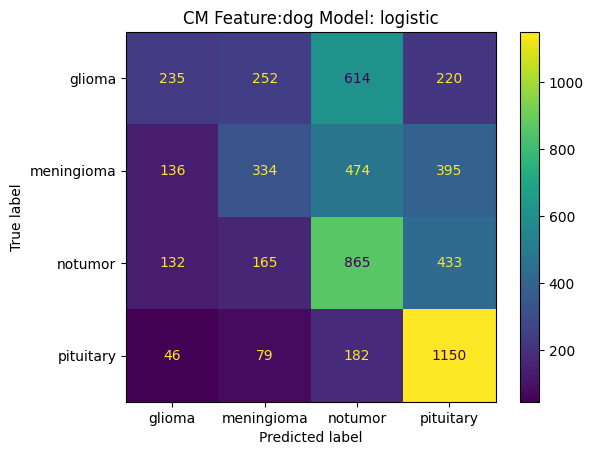

(5712, 4)


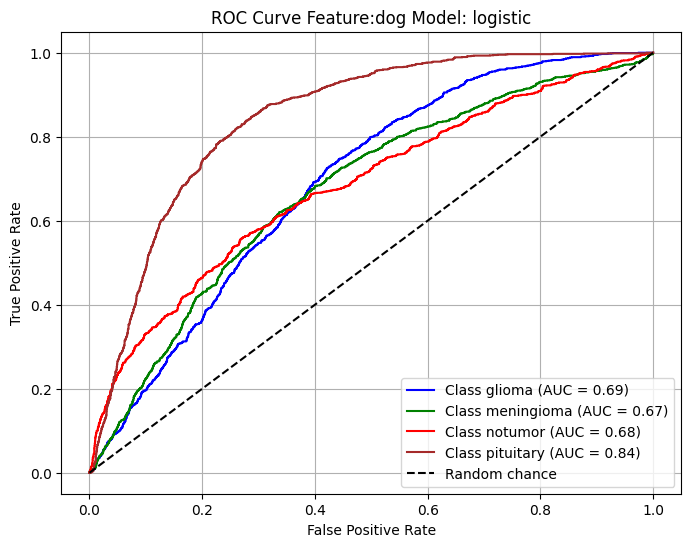

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


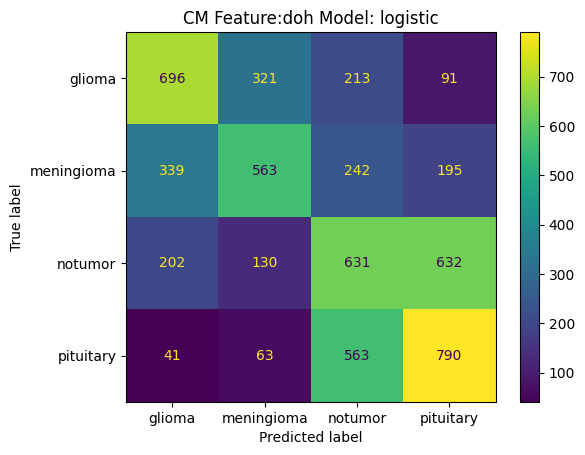

(5712, 4)


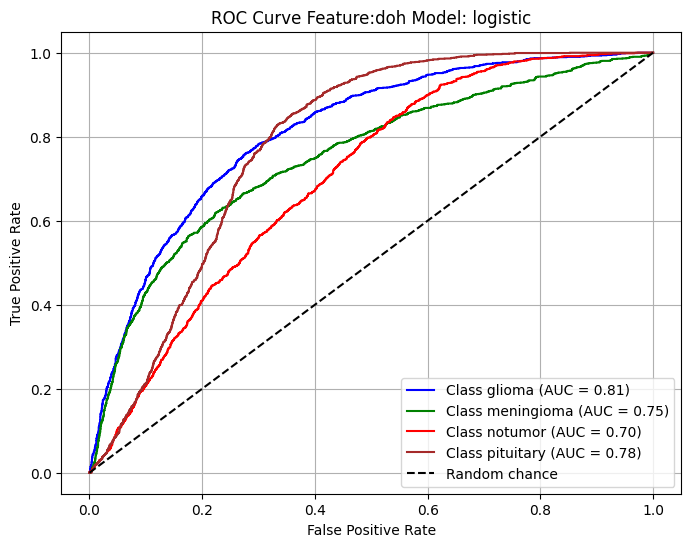

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


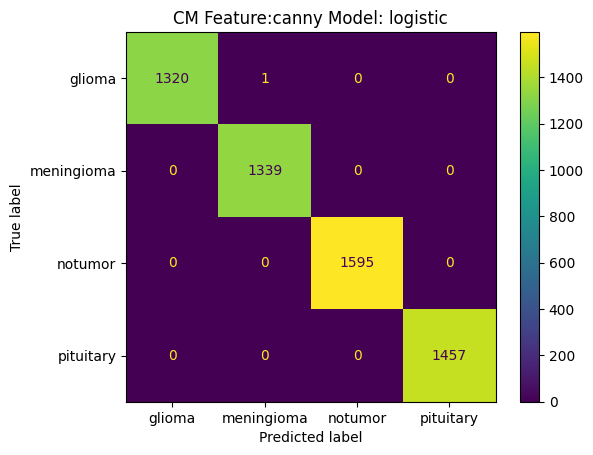

(5712, 4)


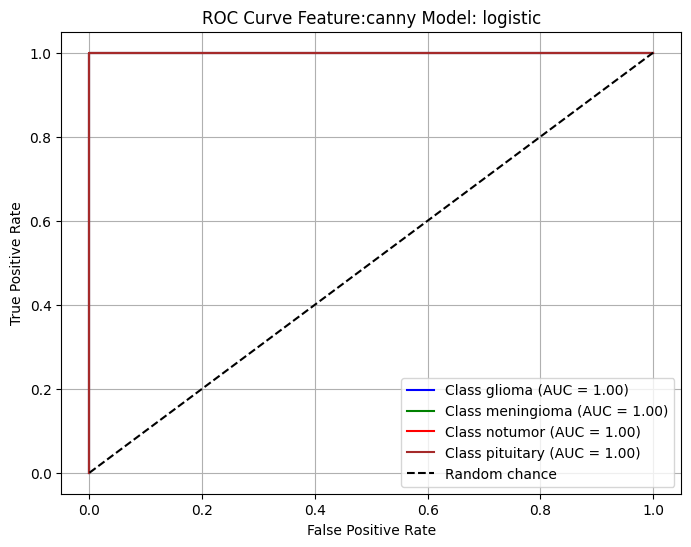

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


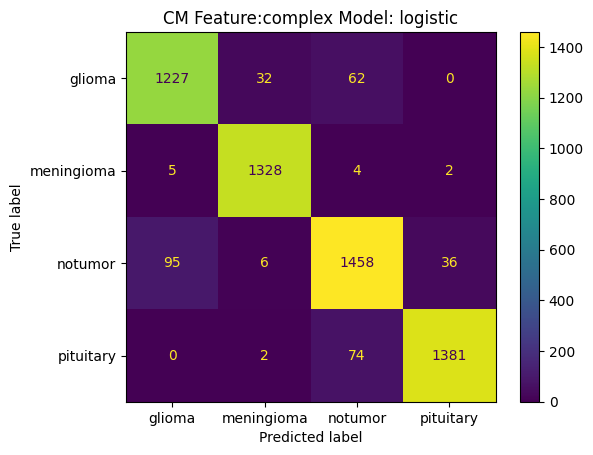

(5712, 4)


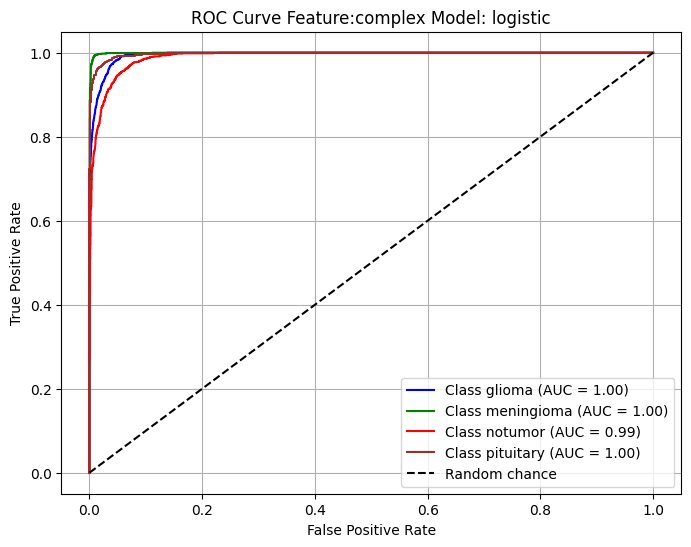

   feature model_type  accuracy_score  macro_precision  macro_recall  \
0      dog   logistic        0.452381         0.439704      0.439737   
1      doh   logistic        0.469188         0.478134      0.471289   
2    canny   logistic        0.999825         0.999813      0.999811   
3  complex   logistic        0.944328         0.945253      0.945643   

   macro_f1  micro_precision  micro_recall  micro_f1  training_time  
0  0.413099         0.452381      0.452381  0.452381       0.647819  
1  0.472472         0.469188      0.469188  0.469188       1.137290  
2  0.999812         0.999825      0.999825  0.999825       1.882597  
3  0.945377         0.944328      0.944328  0.944328      67.245301  


In [17]:
logistic_models = {}
for feature in features.keys():
    logistic_model, results = train_model(features[feature], y_train, classes=le.classes_, model_type='logistic', feature=feature)
    logistic_models[feature] = logistic_model
    all_results.loc[len(all_results)] = results

print(all_results)

In [20]:
logistic_models

{'dog': LogisticRegression(max_iter=1000, multi_class='multinomial'),
 'doh': LogisticRegression(max_iter=1000, multi_class='multinomial'),
 'canny': LogisticRegression(max_iter=1000, multi_class='multinomial'),
 'complex': LogisticRegression(max_iter=1000, multi_class='multinomial')}

In [37]:
save_models(logistic_models, 'logistic_model')

saved model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=dog to path=logistic_model_dog.joblib
saved model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=doh to path=logistic_model_doh.joblib
saved model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=canny to path=logistic_model_canny.joblib
saved model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=complex to path=logistic_model_complex.joblib


#### Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits


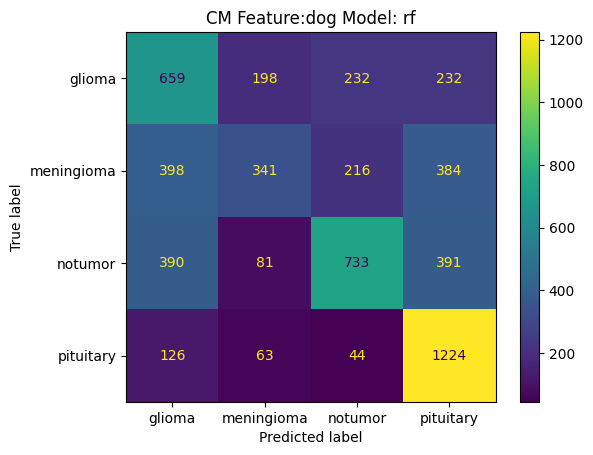

(5712, 4)


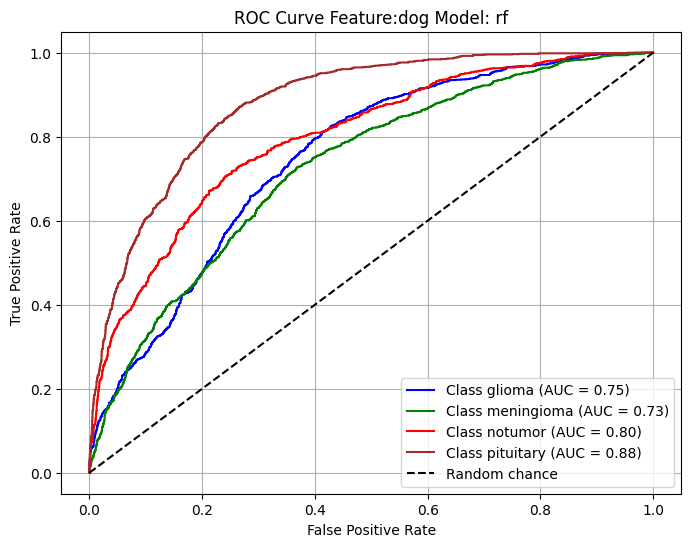

Fitting 5 folds for each of 24 candidates, totalling 120 fits


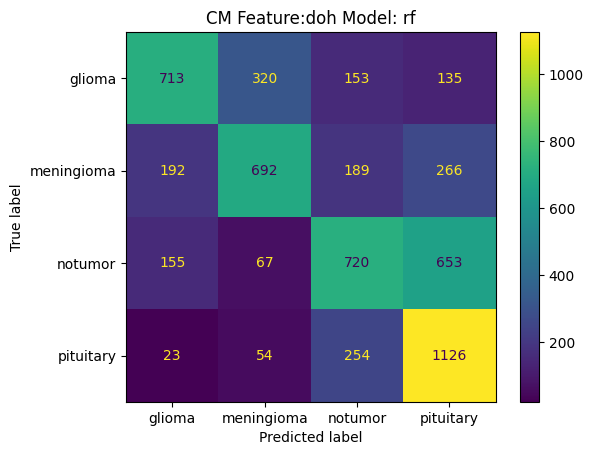

(5712, 4)


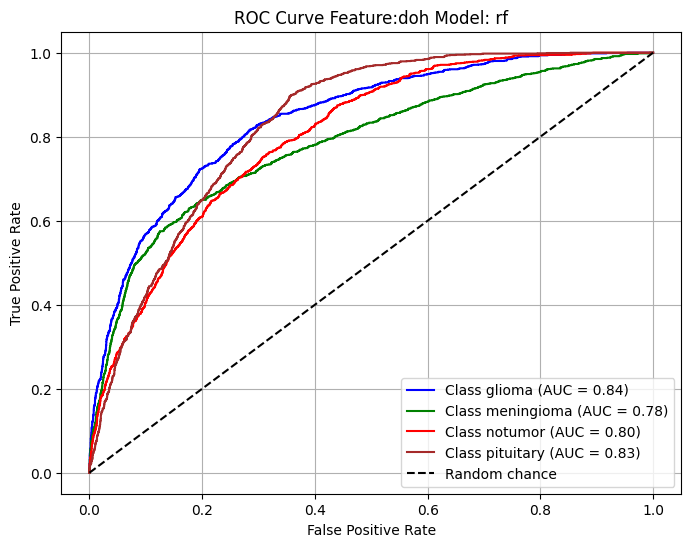

Fitting 5 folds for each of 24 candidates, totalling 120 fits


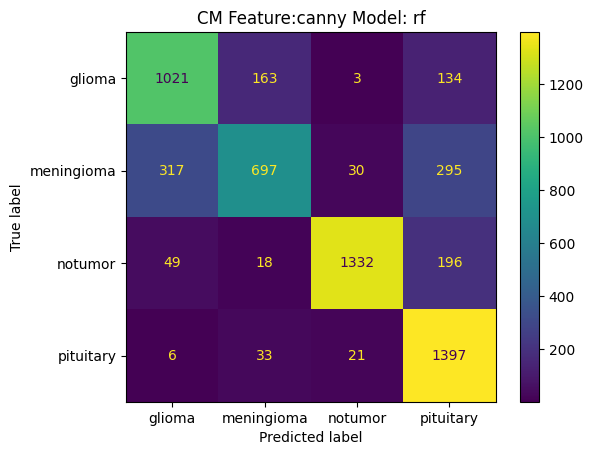

(5712, 4)


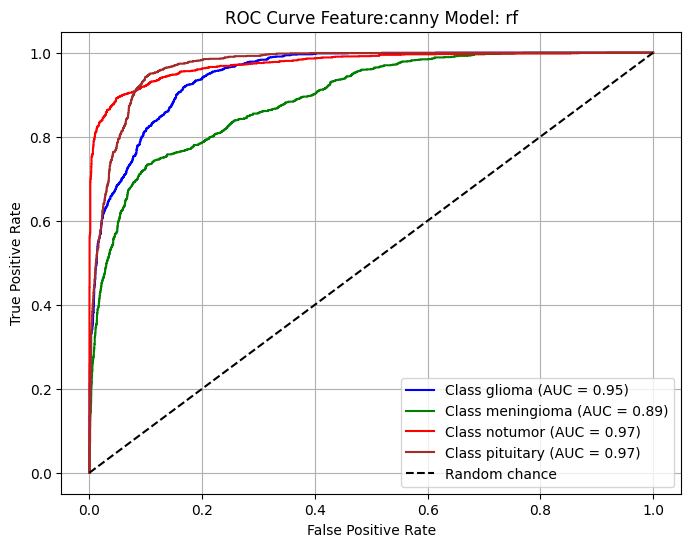

Fitting 5 folds for each of 24 candidates, totalling 120 fits


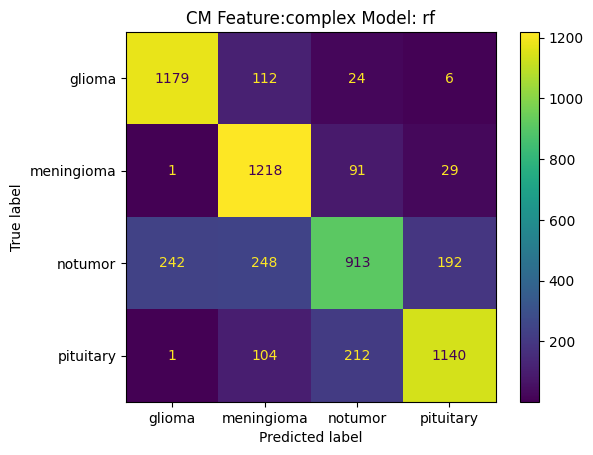

(5712, 4)


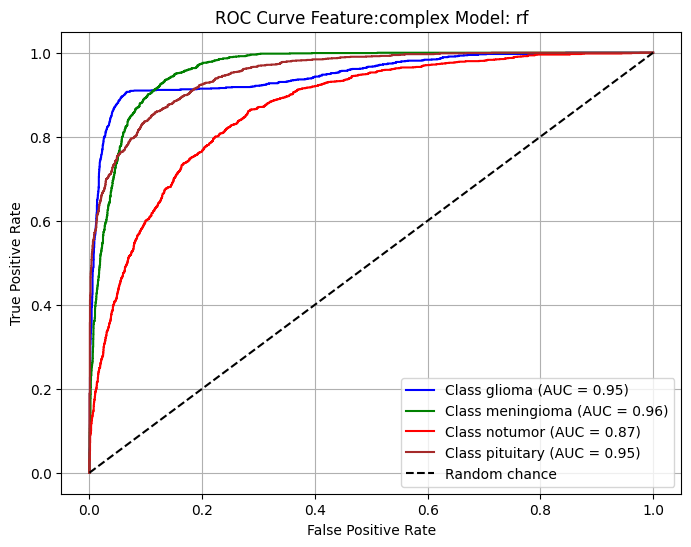

   feature model_type  accuracy_score  macro_precision  macro_recall  \
0      dog   logistic        0.452381         0.439704      0.439737   
1      doh   logistic        0.469188         0.478134      0.471289   
2    canny   logistic        0.999825         0.999813      0.999811   
3  complex   logistic        0.944328         0.945253      0.945643   
4      dog         rf        0.517682         0.516303      0.513294   
5      doh         rf        0.569153         0.583188      0.570194   
6    canny         rf        0.778536         0.787496      0.771842   
7  complex         rf        0.779062         0.780726      0.789246   

   macro_f1  micro_precision  micro_recall  micro_f1  training_time  
0  0.413099         0.452381      0.452381  0.452381       0.647819  
1  0.472472         0.469188      0.469188  0.469188       1.137290  
2  0.999812         0.999825      0.999825  0.999825       1.882597  
3  0.945377         0.944328      0.944328  0.944328      67.245301  
4

In [19]:
rf_models = {}
for feature in features.keys():
    rf_model, results = train_model(features[feature], y_train, classes=le.classes_, model_type='rf', feature=feature)
    rf_models[feature] = rf_model
    all_results.loc[len(all_results)] = results

print(all_results)

In [21]:
rf_models

{'dog': RandomForestClassifier(max_depth=4, n_estimators=110),
 'doh': RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=110),
 'canny': RandomForestClassifier(max_depth=4),
 'complex': RandomForestClassifier(max_depth=4, n_estimators=110)}

In [36]:
save_models(rf_models, 'rf_model')

saved model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=dog to path=rf_model_dog.joblib
saved model=RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=110) for feature=doh to path=rf_model_doh.joblib
saved model=RandomForestClassifier(max_depth=4) for feature=canny to path=rf_model_canny.joblib
saved model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=complex to path=rf_model_complex.joblib


### 6. Final Test Evaluation

In [ ]:
# data_path_test = os.path.join(cwd,'data/Testing')
# destination_path = os.path.join(cwd,'standardized_data/Testing')
# X_test = []
# y_test = []

# for label in os.listdir(data_path_test):
#     for image in os.listdir(os.path.join(data_path_test,label)):
#         image_path = os.path.join(data_path_test,label,image)
#         load_image = preprocess_image(image_path)
#         save_path = os.path.join(destination_path,label,image)
#         plt.imsave(save_path, load_image, cmap='gray')
#         # flatten_image = load_image.flatten()
#         X_test.append(load_image)
#         y_test.append(label)


# # Convert to Numpy Array
# X_test = np.array(X_test)

# np.save('y_raw_test.npy',y_test)
# y_test = np.array(le.transform(y_test))
# np.save('y_test.npy',y_test)

# # Generate Feature Arrays
# X_test_doh_feature = get_features(X_test, feat_name='blob_doh')
# X_test_dog_feature = get_features(X_test, feat_name='blob_dog')
# X_test_canny_feature = get_features(X_test, feat_name='canny')

# np.save('X_test_doh.npy',X_test_doh_feature)
# np.save('X_test_dog.npy',X_test_dog_feature)
# np.save('X_test_canny.npy',X_test_canny_feature)

In [25]:
# load models
features_list = ['dog', 'doh', 'canny', 'complex']
logistic_models = load_models(features_list, 'logistic_model')
rf_models = load_models(features_list, 'rf_model')

loaded model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=dog from path=logistic_model_dog.joblib
loaded model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=doh from path=logistic_model_doh.joblib
loaded model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=canny from path=logistic_model_canny.joblib
loaded model=LogisticRegression(max_iter=1000, multi_class='multinomial') for feature=complex from path=logistic_model_complex.joblib
loaded model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=dog from path=rf_model_dog.joblib
loaded model=RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=110) for feature=doh from path=rf_model_doh.joblib
loaded model=RandomForestClassifier(max_depth=4) for feature=canny from path=rf_model_canny.joblib
loaded model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=complex from path=rf_model_complex.joblib


In [26]:
data_path_test = os.path.join(cwd,'standardized_data/Testing')
X_test = []
y_test = []

for label in os.listdir(data_path_test):
    for image in os.listdir(os.path.join(data_path_test,label)):
        image_path = os.path.join(data_path_test,label,image)
        load_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        # flatten_image = load_image.flatten()
        X_test.append(load_image)
        y_test.append(label)


# Convert to Numpy Array
X_test = np.array(X_test)

In [27]:
y_test = np.load('y_test.npy')
X_test_doh_feature = np.load('X_test_doh.npy')
X_test_dog_feature = np.load('X_test_dog.npy')
X_test_canny_feature = np.load('X_test_canny.npy')
bundle = get_features(None, "complex", joblib_path="complex_feat_testing.joblib", return_bundle=True)
X_test_complex_feature, y_train_complex_feature = bundle.X, bundle.y

Loaded: X=(1311, 768), y=(1311,), paths=1311
Class counts: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}
Mismatches: 0
'glioma' indices sample: [0, 1, 2, 3, 4]


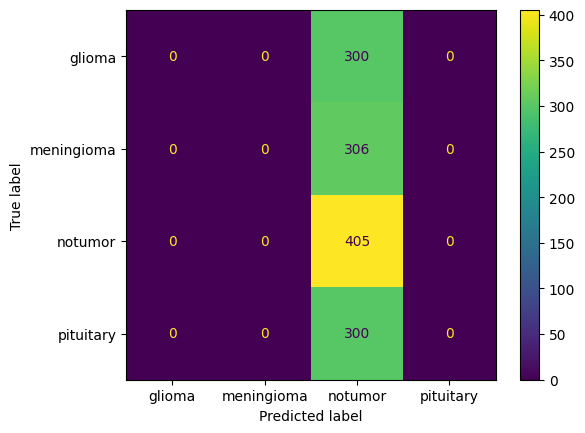

================== TESTING METRICS BASE MODEL ===================
Accuracy Score: 0.30892448512585813
Macro Precision: 0.07723112128146453
Macro Recall: 0.25
Macro F1: 0.11800699300699301
Micro Precision: 0.30892448512585813
Micro Recall: 0.30892448512585813
Micro F1: 0.30892448512585813


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# best model predictions
y_test_base_model = np.ones((y_test.shape)) * most_common_label

# Generate Confusion Matrix for Base Model
confusion_matrix = metrics.confusion_matrix(y_test, y_test_base_model)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y_test, y_test_base_model)
macro_precision = metrics.precision_score(y_test,y_test_base_model,average ='macro')
macro_recall = metrics.recall_score(y_test,y_test_base_model,average='macro')
macro_f1 = metrics.f1_score(y_test,y_test_base_model,average='macro')
micro_precision = metrics.precision_score(y_test,y_test_base_model,average='micro')
micro_recall = metrics.recall_score(y_test,y_test_base_model,average='micro')
micro_f1 = metrics.f1_score(y_test,y_test_base_model,average='micro')

print("================== TESTING METRICS BASE MODEL ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

In [32]:
X_test.shape

(1311, 512, 512)

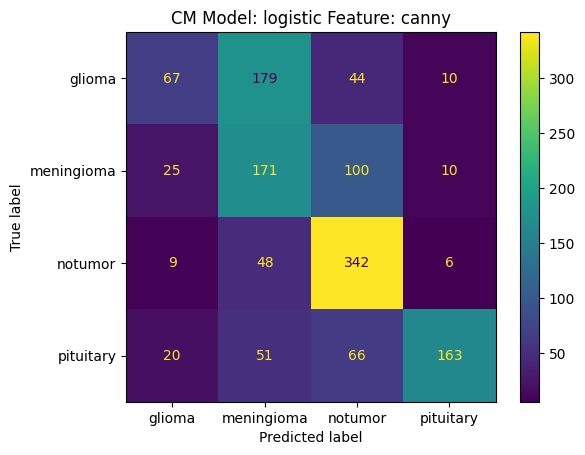

(1311, 4)


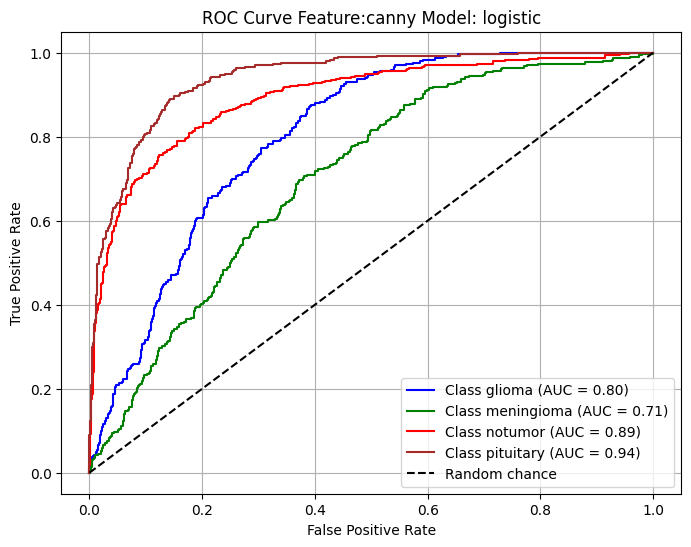

{'feature': 'canny',
 'model_type': 'logistic',
 'accuracy_score': 0.566742944317315,
 'macro_precision': 0.6041411033141668,
 'macro_recall': 0.542483660130719,
 'macro_f1': 0.5381675319150062,
 'micro_precision': 0.566742944317315,
 'micro_recall': 0.566742944317315,
 'micro_f1': 0.566742944317315,
 'inference_time': 0.018997533999936422}

In [34]:
test_model(logistic_models['canny'], X_test_canny_feature, y_test, classes=le.classes_, model_type='logistic', feature='canny')

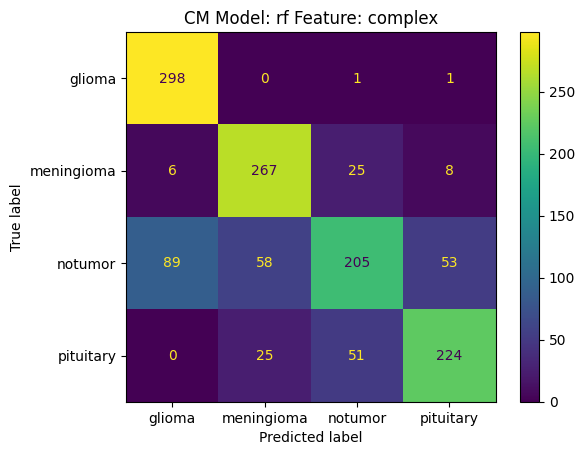

(1311, 4)


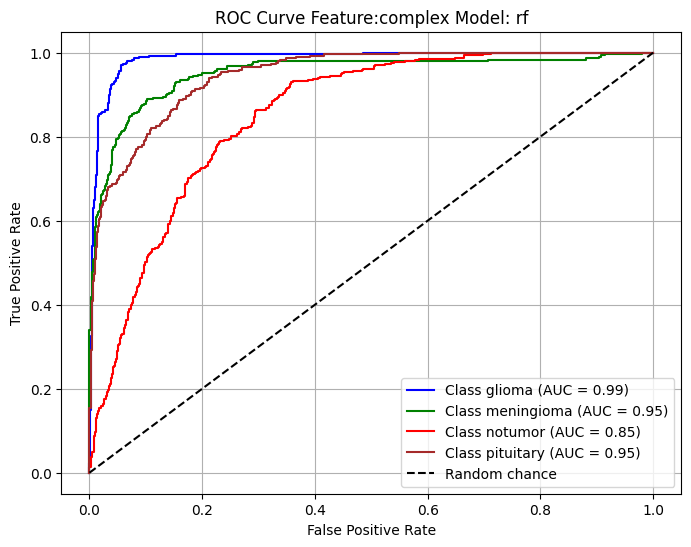

{'feature': 'complex',
 'model_type': 'rf',
 'accuracy_score': 0.7581998474446987,
 'macro_precision': 0.7578235001964091,
 'macro_recall': 0.779680464778504,
 'macro_f1': 0.7588390101900415,
 'micro_precision': 0.7581998474446987,
 'micro_recall': 0.7581998474446987,
 'micro_f1': 0.7581998474446987,
 'inference_time': 0.5517305779994786}

In [35]:
test_model(rf_models['complex'], X_test_complex_feature, y_test, classes=le.classes_, model_type='rf', feature='complex')